<a href="https://colab.research.google.com/github/JonasBaekbo/ML_customer/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
!rm -r machine-learning/  # first remove folder, if present
!git clone https://github.com/JonasBaekbo/ML_customer

rm: cannot remove 'machine-learning/': No such file or directory
Cloning into 'ML_customer'...
remote: Enumerating objects: 80865, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 80865 (delta 44), reused 76 (delta 28), pack-reused 80740
Receiving objects: 100% (80865/80865), 303.09 MiB | 32.26 MiB/s, done.
Resolving deltas: 100% (58985/58985), done.
Updating files: 100% (94954/94954), done.


In [ ]:
dataFrame = pd.read_csv('https://raw.githubusercontent.com/JonasBaekbo/ML_customer/main/csv/customer_staying_or_not.csv')

In [ ]:
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataFrame.isnull().sum()  # will count number of rows 
dataFrame.dropna(inplace=True)


In [ ]:
pd.set_option('display.max_columns', None) # print all columns
X = dataFrame.iloc[ : , 3:13] # select relevant rows and columns to X (here for example all rows and columns 5,6,7,8,9,10 and 11)
y = dataFrame.iloc[ : , -1] # select column(s) for y (here all rows and only the last column)
# Capital X and lower-case y comes from Linear Algebra. The input is often a 2D array (matrix, named X) while the output is often a 1D array (vector, named y)


In [ ]:
X = pd.get_dummies(X) # convert ALL text-columns to categorical variables (One Hot encoding), e.g. gender, country etc. 
columnNames = list(X.columns) # grab column-names before converting to numpy array
X = X.values # convert from Pandas dataframe to numpy array
y = y.values # convert from Pandas dataframe to numpy array

In [ ]:
scaler = StandardScaler() # will change data, so mean=0 and standard deviation = 1
X = scaler.fit_transform(X) # calculate mean and standard deviation and convert dataframe to numpy array
# only use this, if the data is outside -10.0 … 10.0 (as a rule of thumb)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )

In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu')) # 4 outputs. It will automatically adapt to number inputs
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # Final output node for prediction. In this case, only one output neuron

adam = Adam(learning_rate=0.0001) # you may have to change learning_rate, if the model does not learn. 
model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])  
# use loss = 'binary_crossentropy' for two-class classification.
# use loss = 'categorical_crossentropy' for multi-class classification.
# use loss = 'mse' (Mean Square Error) for regression (e.g. the Age,Height exercise). 
# For classification only: use metrics = ['accuracy']. It shows successful predictions / total predictions

In [ ]:
model.fit(X_train,y_train,epochs=100, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.2812 - accuracy: 0.4094
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.4815
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2417 - accuracy: 0.5546
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2279 - accuracy: 0.6140
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.6726
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.2060 - accuracy: 0.7241
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.1973 - accuracy: 0.7626
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.1901 - accuracy: 0.7829
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.7912
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.1792 - accura

<AxesSubplot:>

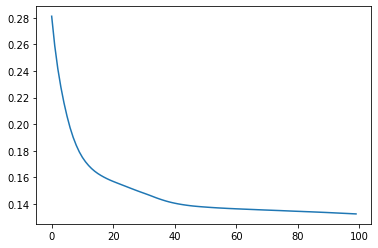

In [ ]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)


In [ ]:
model.evaluate(X_test,y_test,verbose=1) 



63/63 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.8275


[0.12738469243049622, 0.8274999856948853]

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)

# will return a 2D array like this (random numbers):  
# [[6432   326]
 # [ 481  1190]]

# interpretation: 
# Top-left: 6432 correct predictions of 0. 
# Top-right: 326 incorrect predictions of 1, when the y_test was 0.
# Bottom-left: 481 incorrect predictions of 0, when the y_test was 1.
# Bottom-right: 1190 correct predictions of 1


63/63 [==============================] - 0s 1ms/step
[[1539   68]
 [ 277  116]]


In [ ]:
print(columnNames) # first print column names, so you can enter new data in the correct columns
new_value = [[600,40,4,60000,2,1,1,50000,1,0,0,0,1]] # enter new data in 2D array. Only numbers + dummy variables. 
                                                                                                                                    # TODO, JON: tool to getDummies() for new predictions
new_value = scaler.transform(new_value) # Don't forget to scale!
model.predict(new_value)



['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
1/1 [==============================] - 0s 35ms/step


array([[0.03948857]], dtype=float32)

In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
myModel = load_model('my_model.h5') # myModel is ready for predicting right away!